In [1]:
import sys
sys.path.append("..")

from src.nn.inference.melody_inference import MelodyInference
from src.data.structures.melody import Melody

In [2]:
audio = "..\\datasets\\melody_extraction\\test\\audio\\test.wav"
midi = "..\\datasets\\melody_extraction\\test\\labels\\test.mid"

Slicing audio: 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


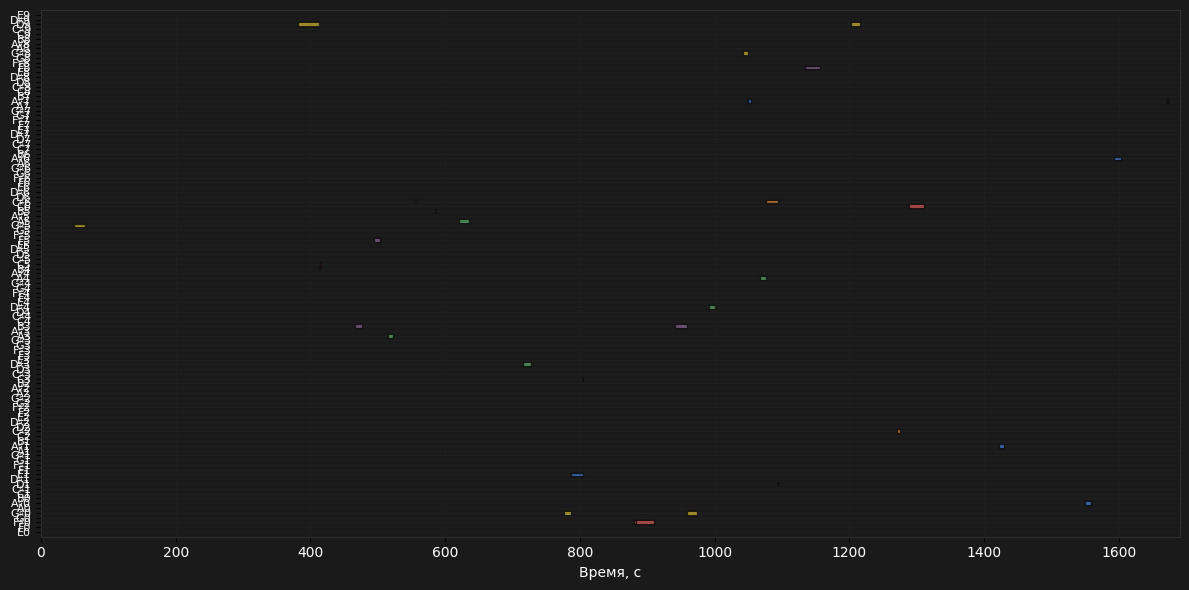

In [3]:
melody_inference = MelodyInference("..\\src\\nn\\logs\\i_1.0_d_1.0_l_1.0\\checkpoints\\last.ckpt")
melody = melody_inference.extract_melody(audio, tempo=120)
melody.visualize()

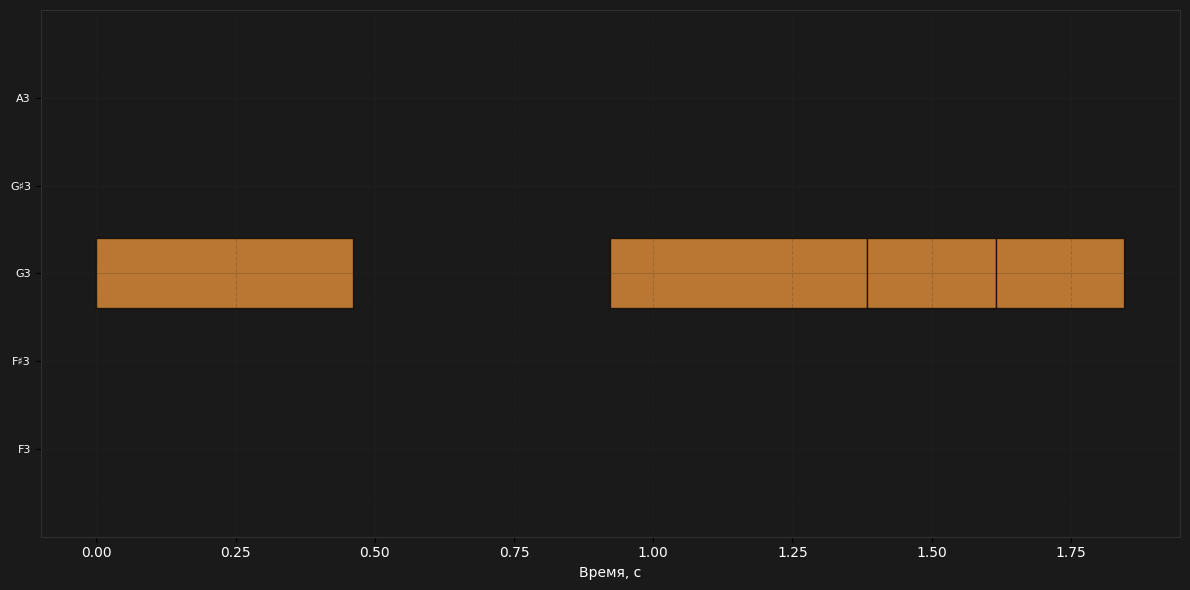

In [6]:
target = Melody.from_midi(midi)
target.visualize()